<a href="https://colab.research.google.com/github/sankalp-srivastava/Handwritten-digit-recognition/blob/main/Handwritten_Digit_Recogniton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand Written Digit Recignition**

###Importing Libraries

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

###Preparing Dataset

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


###Creating Model

In [ ]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

### Compiling Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

### Adding Callback to stop training at 99.8% accuracy

In [20]:
class Mycallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy') > 0.998):
      print("Reached 99.8% .... Stopping Training")
      self.model.stop_training = True

### Training

In [21]:
callbacks = Mycallback()
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs,
  callbacks = [callbacks]
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0063 - accuracy: 0.9980
Reached 99.8% .... Stopping Training


### Visuals of Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

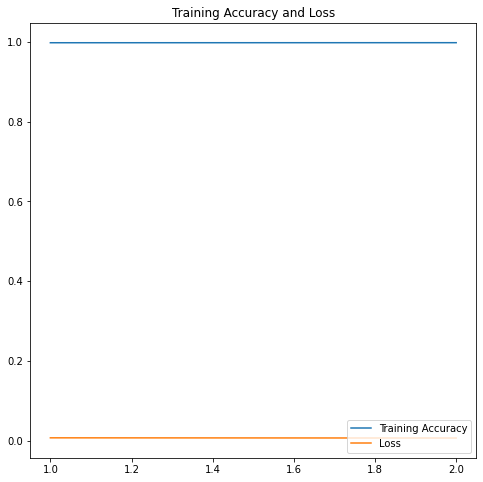

In [25]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = [1,2]
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

### Testing Image

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction of model: 0


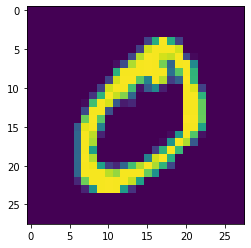

In [26]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict_classes(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Test images array shape: (9, 28, 28)
Predicted digit: 0
Predicted digit: 6
Predicted digit: 9
Predicted digit: 0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted digit: 1
Predicted digit: 5
Predicted digit: 9
Predicted digit: 7
Predicted digit: 3


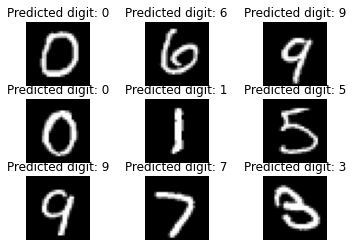

In [42]:
images = test_images[10:19]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(3,3,i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

Model Results

In [48]:
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels)
print("Test loss ={} \nTest accuracy = {}".format(results[0],results[1]*100))

Evaluate on test data
313/313 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9911
Test loss =0.04030095040798187 
Test accuracy = 99.1100013256073


Saving the model

In [49]:
model.save("digitrecognition")

INFO:tensorflow:Assets written to: digitrecognition/assets
